<a href="https://colab.research.google.com/github/Rahulramj/recommended-movies-on-netflixlist-/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

df = pd.read_csv('amazon_prime_users.csv')

null_counts = df.isnull().sum()
print("Null value counts:\n", null_counts)
df['Name'].fillna("Unknown", inplace=True)
df['Gender'].fillna("Not specified", inplace=True)
df['Location'].fillna("N/A", inplace=True)
df.to_csv('cleaned_dataset.csv', index=False)

print("Cleaned dataset saved successfully!")


Null value counts:
 User ID                          0
Name                             0
Email Address                    0
Username                         0
Date of Birth                    0
Gender                           0
Location                         0
Membership Start Date            0
Membership End Date              0
Subscription Plan                0
Payment Information              0
Renewal Status                   0
Usage Frequency                  0
Purchase History                 0
Favorite Genres                  0
Devices Used                     0
Engagement Metrics               0
Feedback/Ratings                 0
Customer Support Interactions    0
dtype: int64
Cleaned dataset saved successfully!


In [25]:
import pandas as pd

df = pd.read_csv('amazon_prime_users.csv')


In [26]:
summary_stats = df.describe()
print(summary_stats)


          User ID  Feedback/Ratings  Customer Support Interactions
count  2500.00000       2500.000000                    2500.000000
mean   1250.50000          4.004760                       4.951600
std     721.83216          0.580769                       3.191572
min       1.00000          3.000000                       0.000000
25%     625.75000          3.500000                       2.000000
50%    1250.50000          4.000000                       5.000000
75%    1875.25000          4.500000                       8.000000
max    2500.00000          5.000000                      10.000000


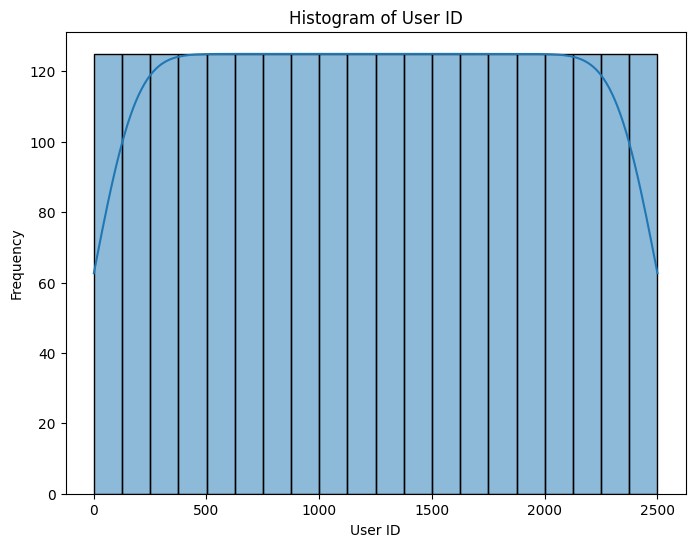

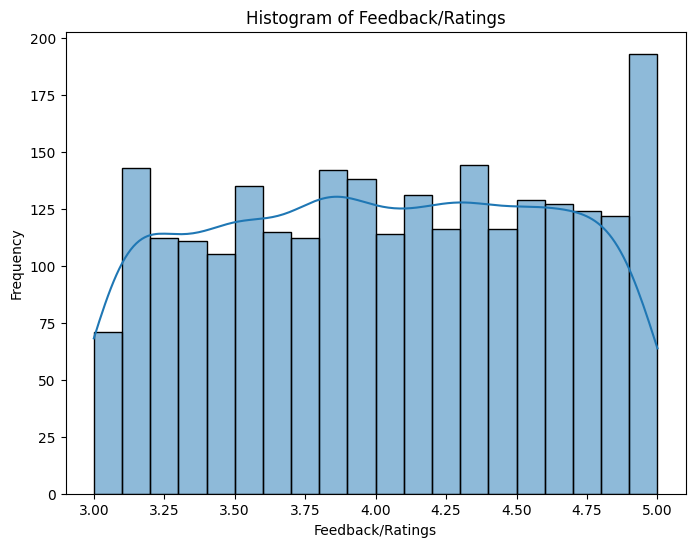

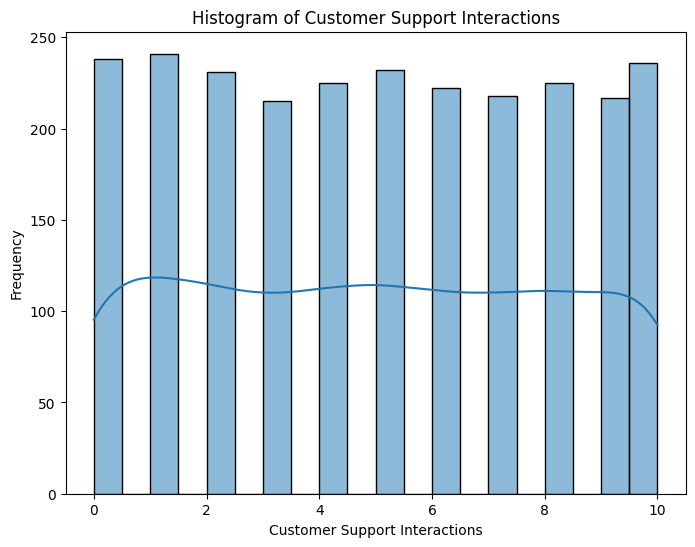

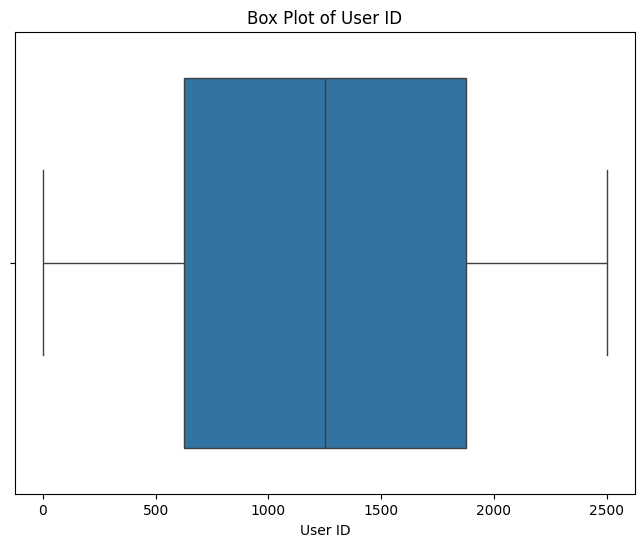

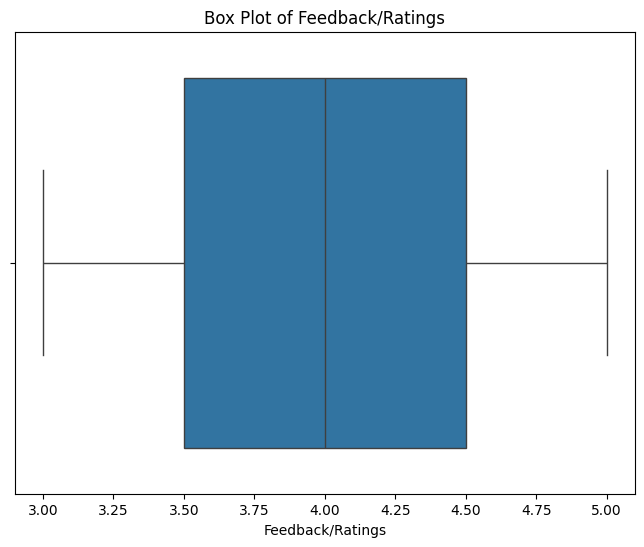

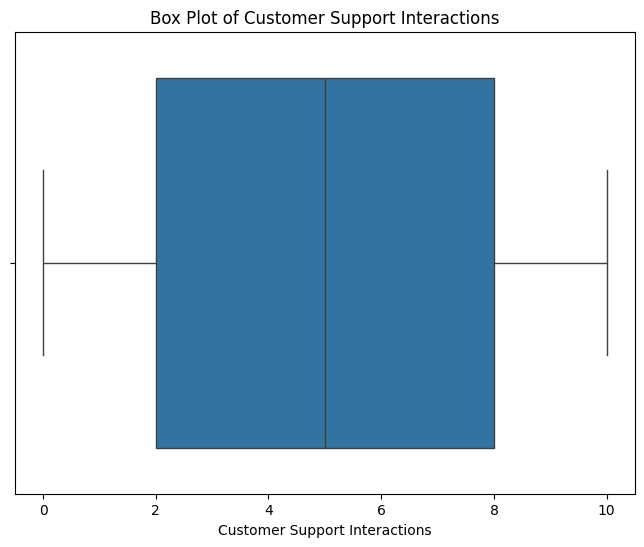

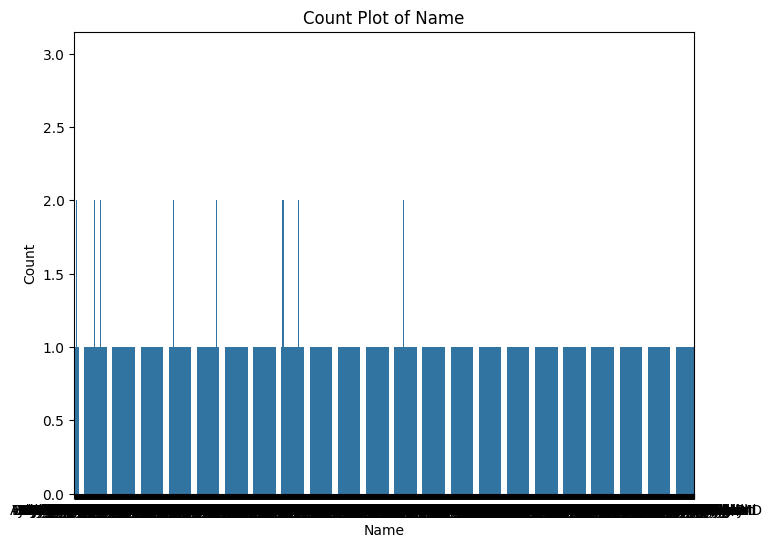

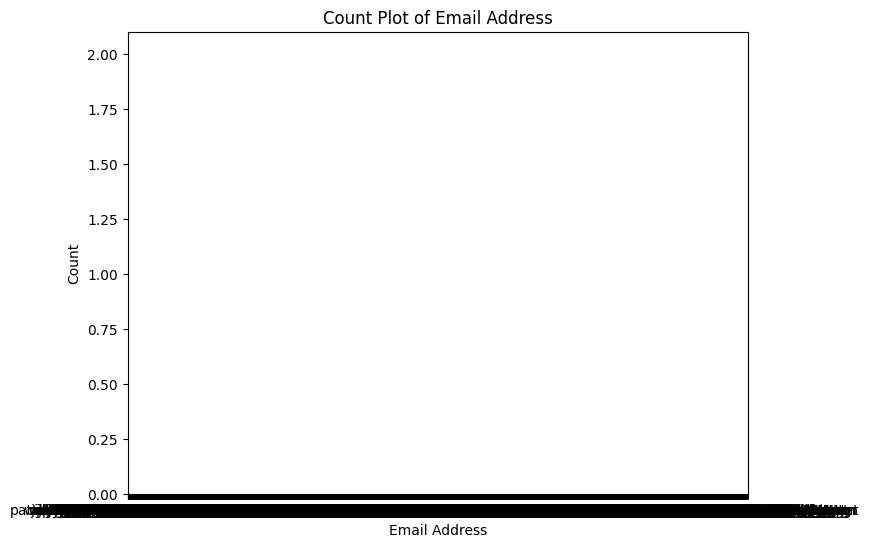

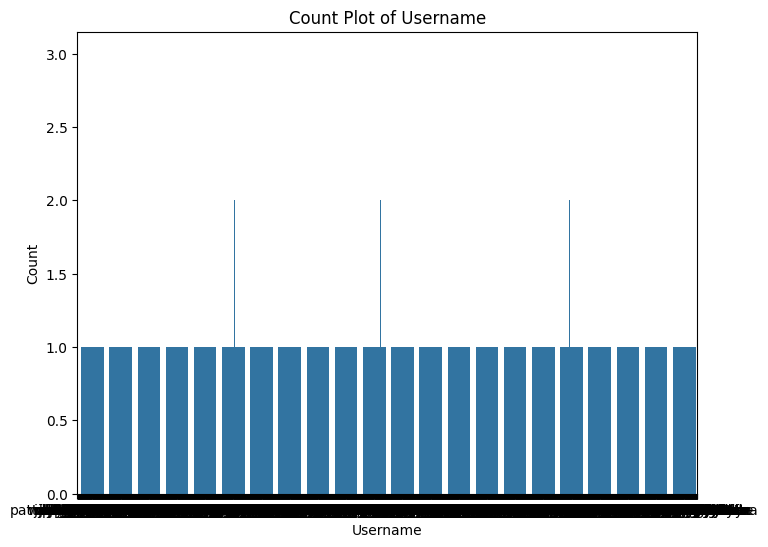

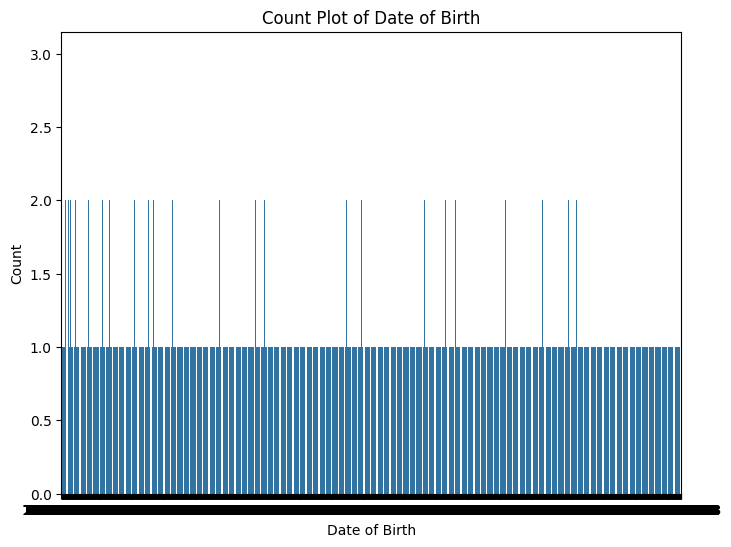

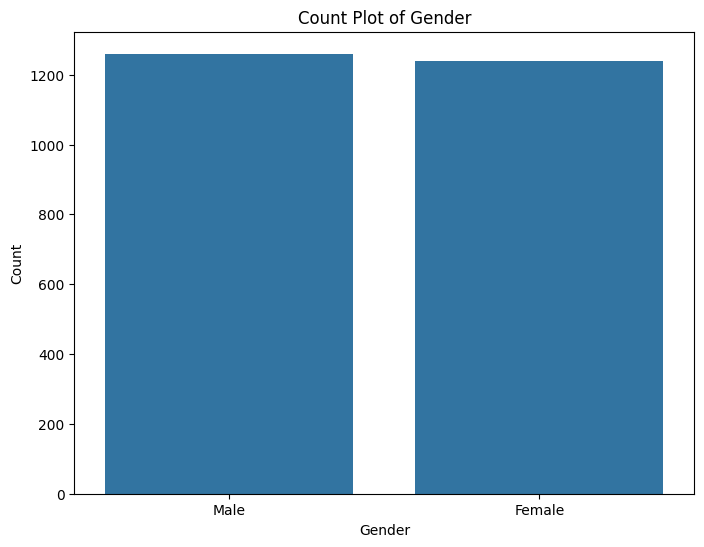

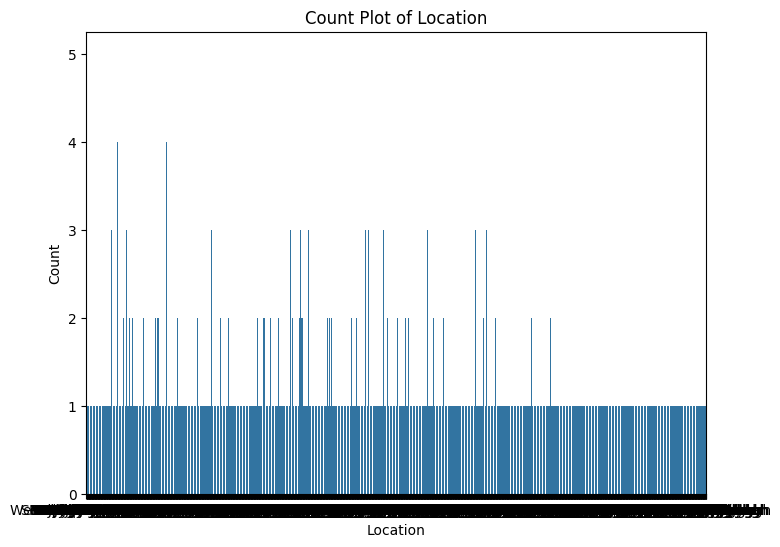

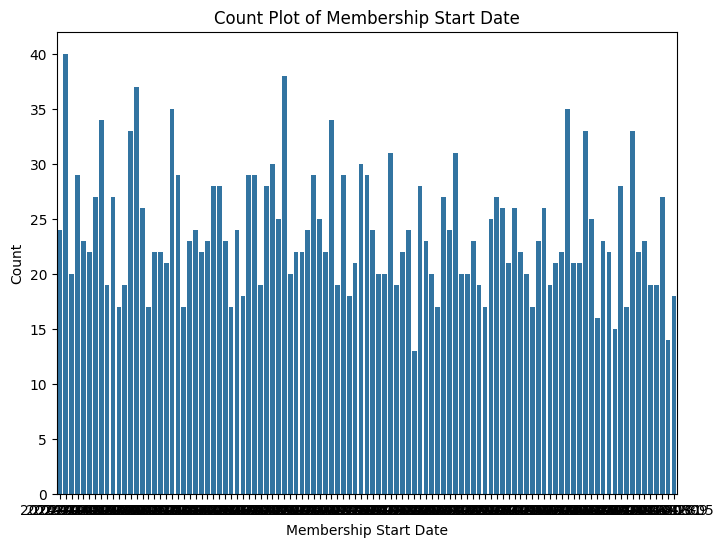

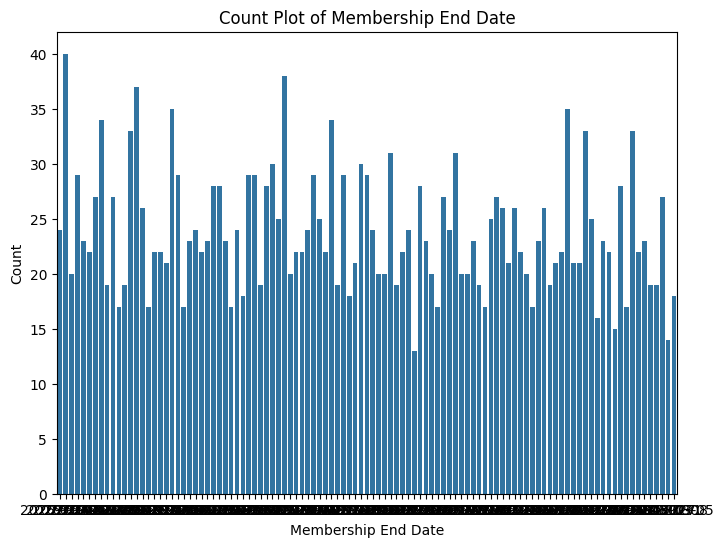

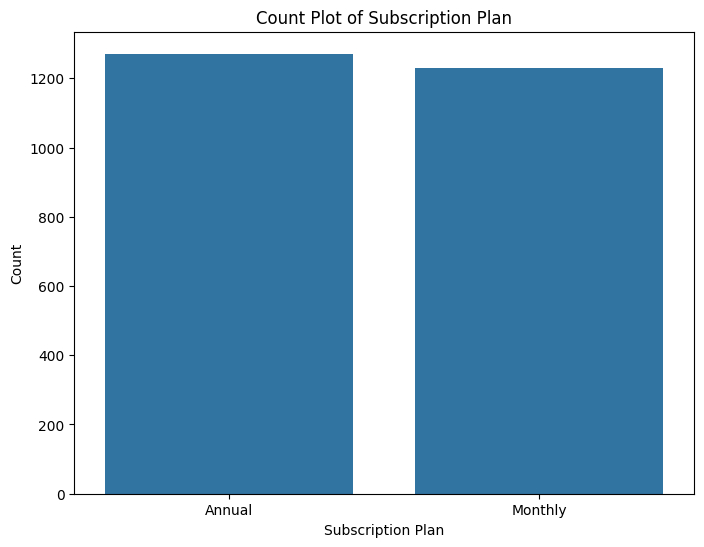

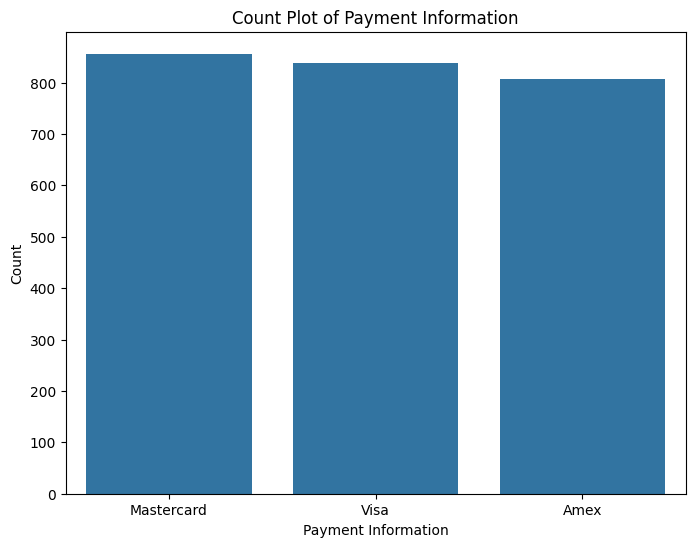

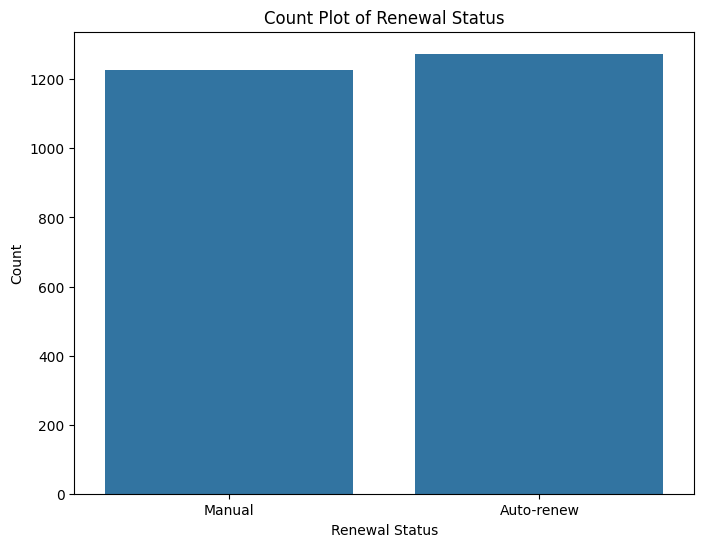

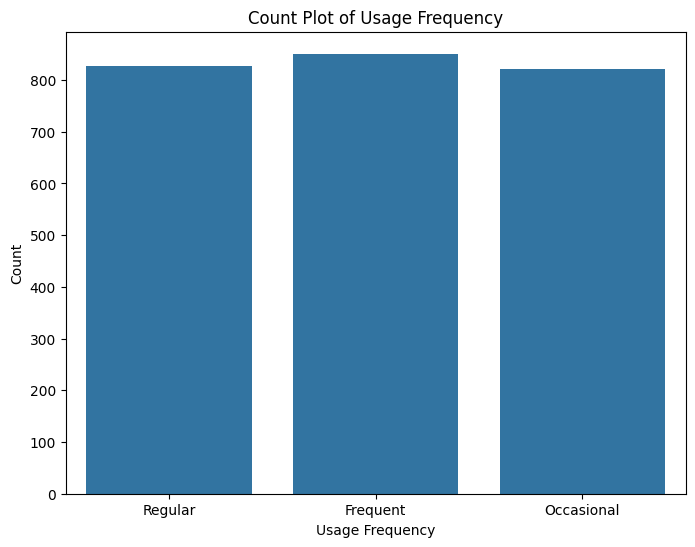

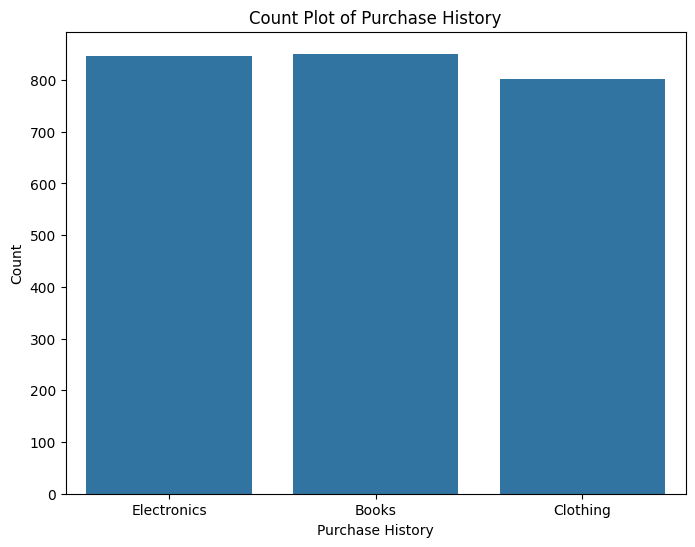

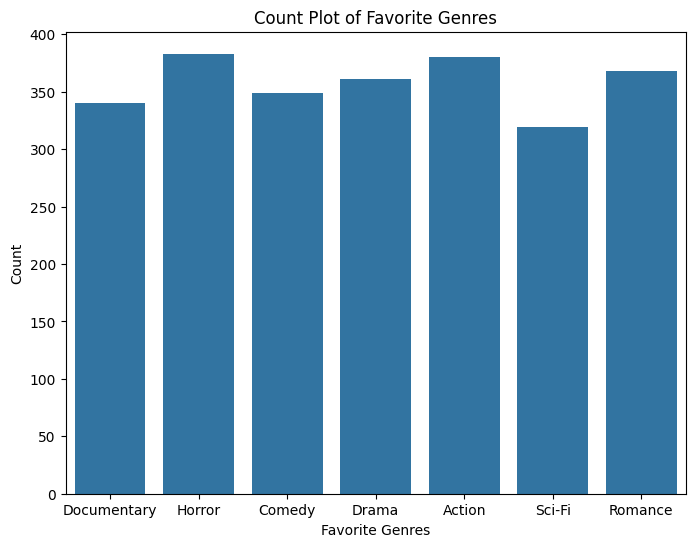

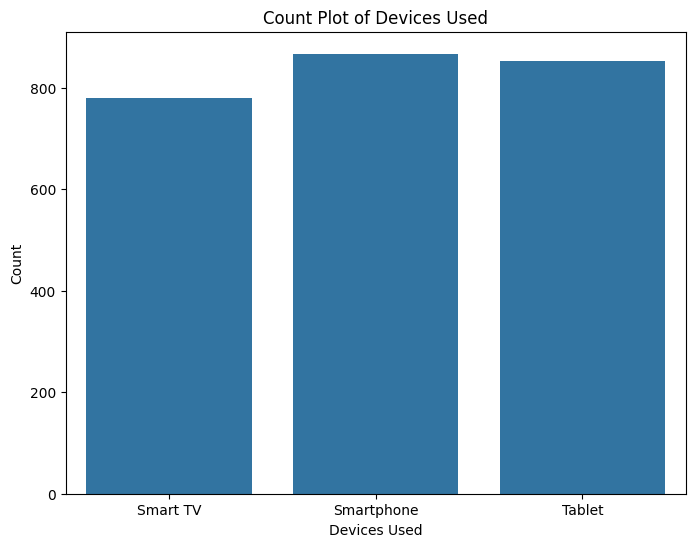

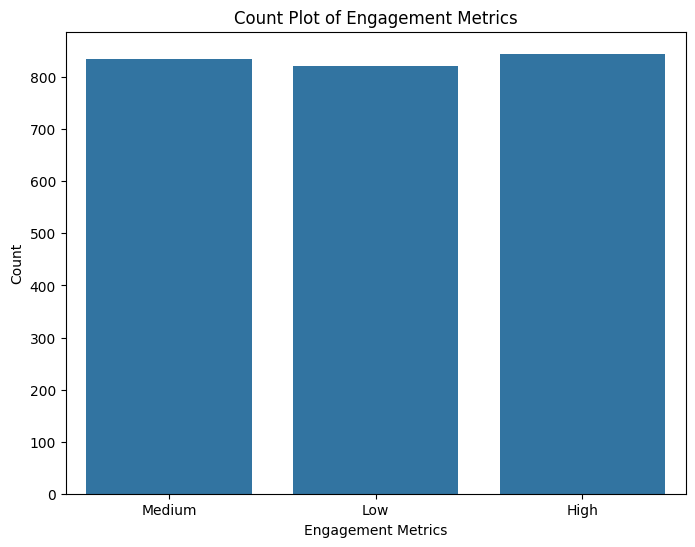

Summary statistics:
           User ID  Feedback/Ratings  Customer Support Interactions
count  2500.00000       2500.000000                    2500.000000
mean   1250.50000          4.004760                       4.951600
std     721.83216          0.580769                       3.191572
min       1.00000          3.000000                       0.000000
25%     625.75000          3.500000                       2.000000
50%    1250.50000          4.000000                       5.000000
75%    1875.25000          4.500000                       8.000000
max    2500.00000          5.000000                      10.000000
Correlation matrix:
                                 User ID  Feedback/Ratings  \
User ID                        1.000000         -0.012520   
Feedback/Ratings              -0.012520          1.000000   
Customer Support Interactions -0.039872          0.008026   

                               Customer Support Interactions  
User ID                                        

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('amazon_prime_users.csv')

numeric_summary = df.describe()

for col in df.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

for col in df.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

print("Summary statistics:\n", numeric_summary)
print("Correlation matrix:\n", correlation_matrix)


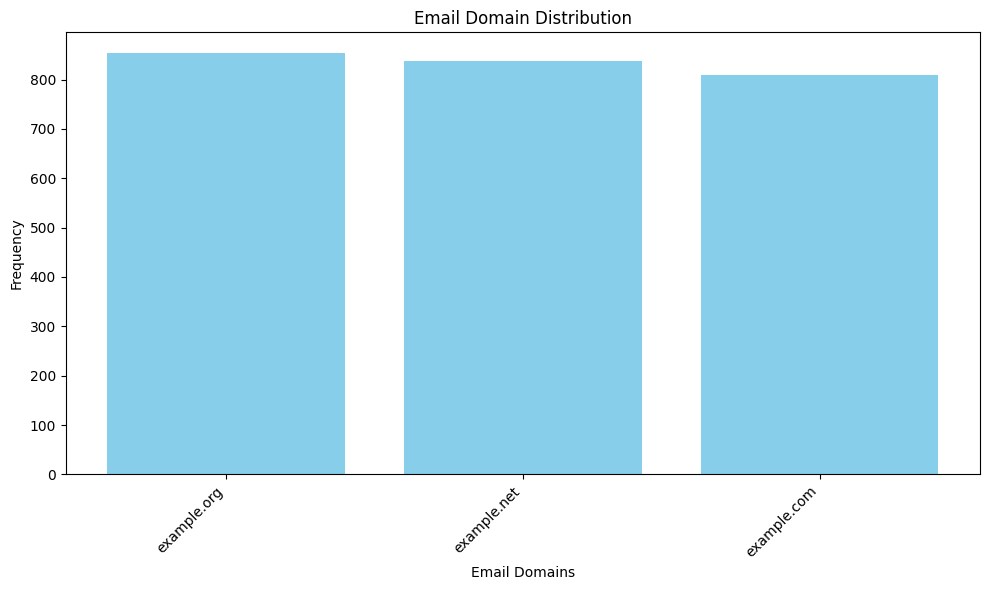

In [27]:

df['Domain'] = df['Email Address'].str.split('@').str[-1]

domain_counts = df['Domain'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(domain_counts.index, domain_counts.values, color='skyblue')
plt.xlabel('Email Domains')
plt.ylabel('Frequency')
plt.title('Email Domain Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [28]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)


Gender
Male      1260
Female    1240
Name: count, dtype: int64


In [29]:
text = [
    "kolkata big city india trade",
    "mumbai financial capital india",
]

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(text)

df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(df_tfidf)


        big   capital      city  financial     india   kolkata    mumbai  \
0  0.471078  0.000000  0.471078   0.000000  0.335176  0.471078  0.000000   
1  0.000000  0.534046  0.000000   0.534046  0.379978  0.000000  0.534046   

      trade  
0  0.471078  
1  0.000000  


In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

movies = pd.DataFrame({
    'Title': ['Movie A', 'Movie B', 'Movie C'],
    'Genre': ['Action, Adventure', 'Drama, Romance', 'Action, Sci-Fi']
})

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(movies['Genre'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations(title):
    idx = movies.index[movies['Title'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:3]  # Top 2 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return movies['Title'].iloc[movie_indices]

recommended_movies = get_recommendations('Movie A')
print("Recommended movies for 'Movie A':")
print(recommended_movies)


Recommended movies for 'Movie A':
2    Movie C
1    Movie B
Name: Title, dtype: object
